# Pymaceuticals Inc.
---

### Analysis

The data show the testing for drug treatment on cancer related tumor. Multiple drug were tested on mice. 
Our plot graph, which illustrate the distribution of tumor volume shows that, Capomulin the drug being evaluated, along with Ramicane, seems to perform on the same level.
Our line graph shows the decline of volume over time on mice, subject I509, which indicate a positive outcome as the test subject was treated with Capomulin and the size of the tumor reduced from 45 to close to 40 after 30 days. 
Finally, our regression test further exampified the positive outcome of the Capomulin treatment with a correlation coefficient of 0.84, a strong relation of the tumor volume and weight of mice being treated with Capomulin.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
consolidated_data = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
consolidated_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_unique_mice = consolidated_data['Mouse ID'].nunique()
number_unique_mice

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = consolidated_data[consolidated_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = consolidated_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
number_unique_mice_clean = clean_data['Mouse ID'].nunique()

In [13]:
# Checking the number of mice in the clean DataFrame.
number_unique_mice_clean

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    variance='var',
    std_dev='std',
    SEM='sem'
).reset_index()
summary_stats

,Drug Regimen,mean,median,variance,std_dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    ['mean', 'median', 'var', 'std', 'sem']
).reset_index()
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats

,Drug Regimen,mean,median,var,std,sem
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

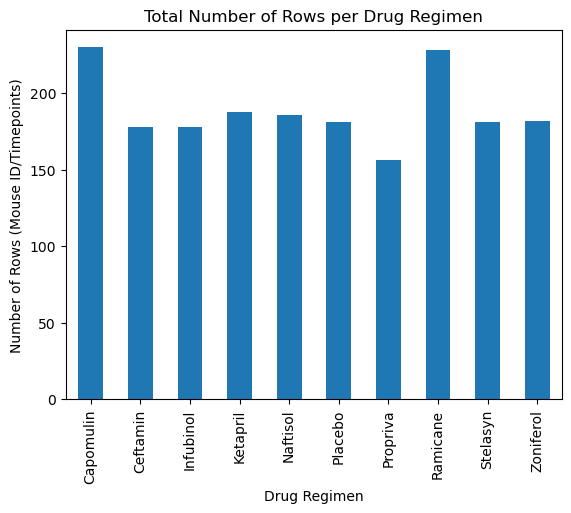

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = clean_data.groupby('Drug Regimen').size()
row_counts.plot(kind='bar')
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.show()

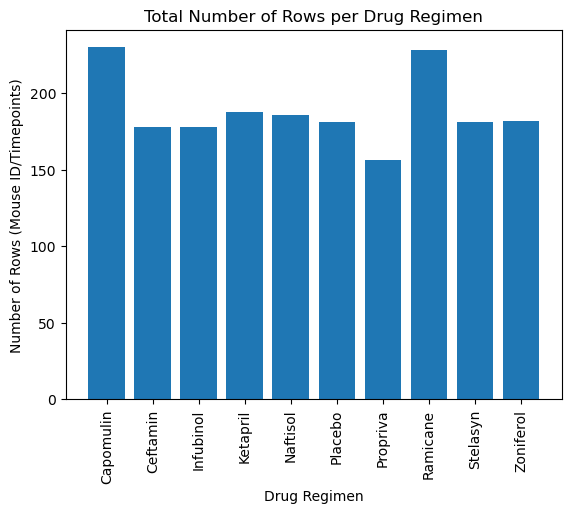

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_counts = clean_data.groupby('Drug Regimen').size()
plt.bar(row_counts.index, row_counts.values)
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.xticks(rotation=90)
plt.show()

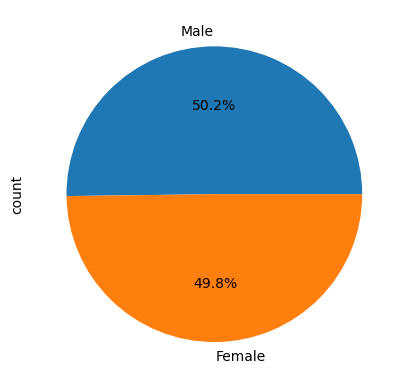

In [25]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
unique_mice_gender = clean_data.drop_duplicates(subset=['Mouse ID'])['Sex'].value_counts()
# Get the unique mice with their gender
unique_mice_gender.plot(kind='pie', autopct='%1.1f%%', legend=False)

# Make the pie chart
plt.show()

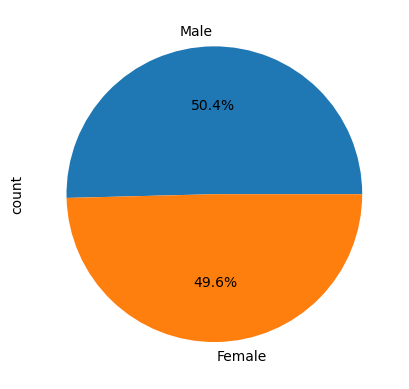

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_data = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])
last_timepoint_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []
for treatment in treatment_list:
        treatment_data = last_timepoint_data[last_timepoint_data['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
        tumor_volumes.append(treatment_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
lower_q = quartiles[0.25]
upper_q = quartiles[0.75]
iqr = upper_q - lower_q

    # Locate the rows which contain mice on each drug and get the tumor volumes
lower_bound = lower_q - (1.5 * iqr)
upper_bound = upper_q + (1.5 * iqr)

    # add subset


    # Determine outliers using upper and lower bounds
outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

print(f"{treatment} - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Outliers: {outliers.values}")
print("-" * 50)

Ceftamin - Lower Bound: 25.355449580000002, Upper Bound: 87.66645829999999
Outliers: []
--------------------------------------------------


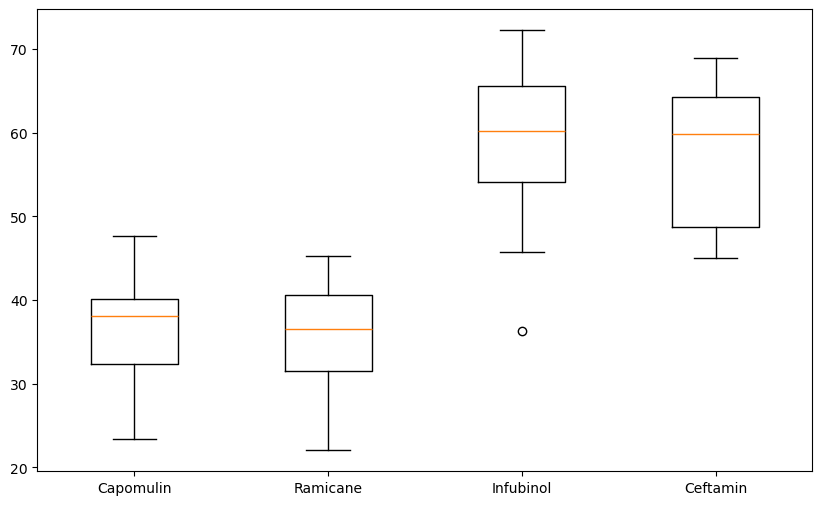

In [45]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(tumor_volumes, tick_labels=treatment_list, flierprops=dict(marker='o'))
plt.show()

## Line and Scatter Plots

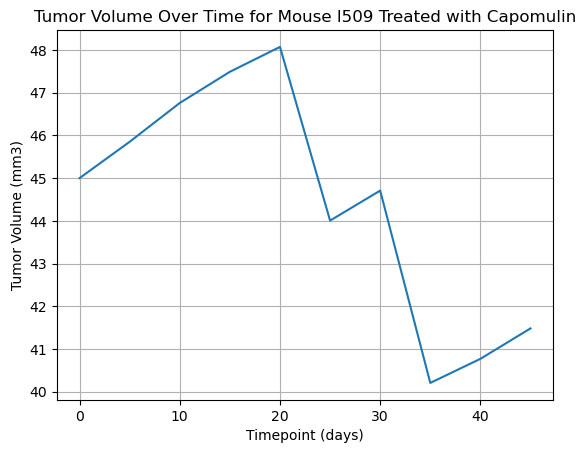

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
single_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == mouse_id)]
                                                                                  
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'])
plt.title(f'Tumor Volume Over Time for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

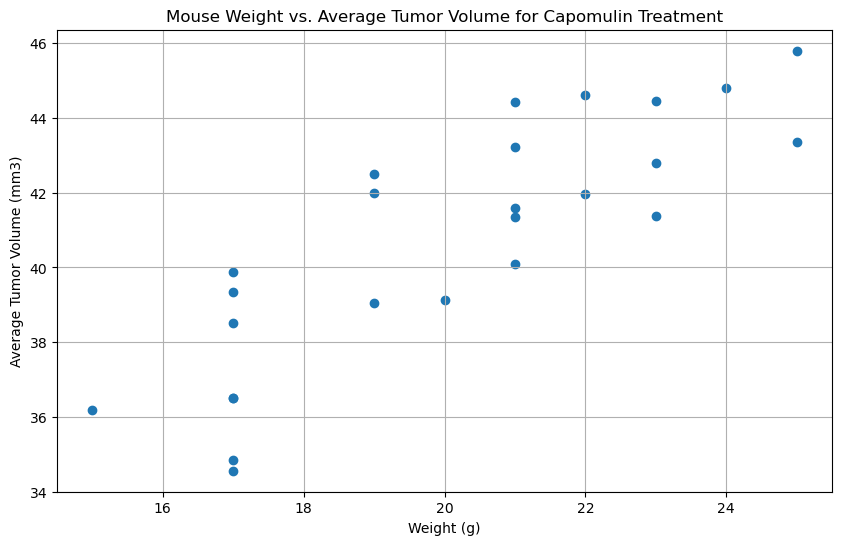

In [41]:
# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation coefficient: 0.8419363424694721


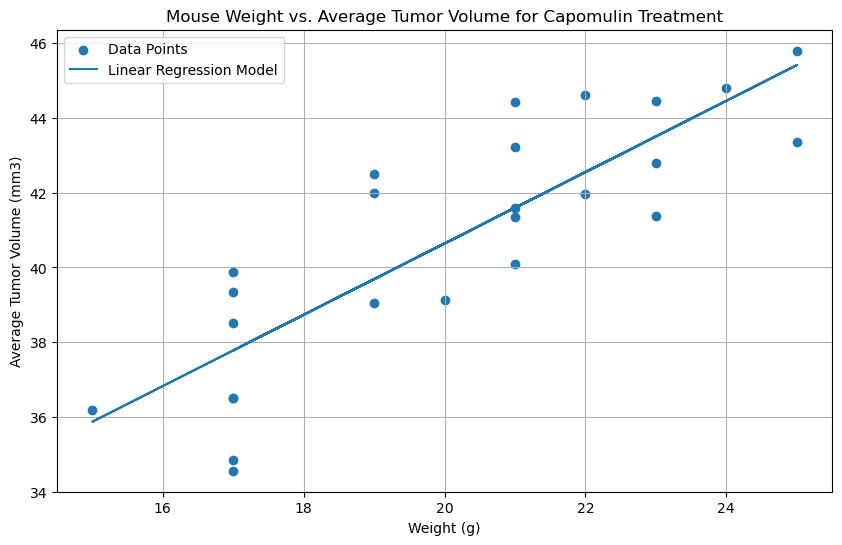

In [43]:
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the weight of each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Calculate the correlation coefficient and a linear regression model
correlation = avg_tumor_volume.corr(mouse_weight)
print(f'Correlation coefficient: {correlation}')

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_tumor_volume)

# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight, avg_tumor_volume, label='Data Points')

# Plot the linear regression model
plt.plot(mouse_weight, slope * mouse_weight + intercept, label='Linear Regression Model')

# Customize the plot
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Treatment')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
